In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import compute_class_weight

In [2]:
# Parameters of the Axelrod model
grid_size = 32  # size of the grid
F = 3  # number of features
q = 10  # number of traits per feature

# Parameter for the noise
noise = 0.01  # probability of random cultural drift

# Parameter for the mass media influence
media = 0.01  # probability of adopting the global culture

In [3]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

In [4]:
def simulation_step():
    # Randomly select an agent
    x, y = np.random.randint(grid_size, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size  # periodic boundary conditions

    # If they share at least one cultural feature
    if any(culture_grid[x, y, :] == culture_grid[nx, ny, :]):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(culture_grid[x, y, :] != culture_grid[nx, ny, :])[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

def simulation_step_with_noise():
    # Perform a normal simulation step
    simulation_step()

    # With a small probability, an agent randomly changes one of its features
    if np.random.rand() < noise:
        x, y = np.random.randint(grid_size, size=2)
        f = np.random.randint(F)
        culture_grid[x, y, f] = np.random.randint(q)

# The global culture
global_culture = np.random.randint(q, size=F)

def simulation_step_with_noise_and_media():
    # Perform a simulation step with noise
    simulation_step_with_noise()

    # With a small probability, an agent adopts the global culture
    if np.random.rand() < media:
        x, y = np.random.randint(grid_size, size=2)
        culture_grid[x, y, :] = global_culture

# Function to calculate the size of the largest homogeneous domain (Smax)
def calculate_Smax(culture_grid):
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    s = np.max(np.unique(culture_int, return_counts=True)[1])
    return s

In [13]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

Smax_norm = []

# Run the simulation for a certain number of steps
for _ in range(300000):
    simulation_step()
    T = calculate_Smax(culture_grid)/(grid_size**2)
    Smax_norm.append(T)

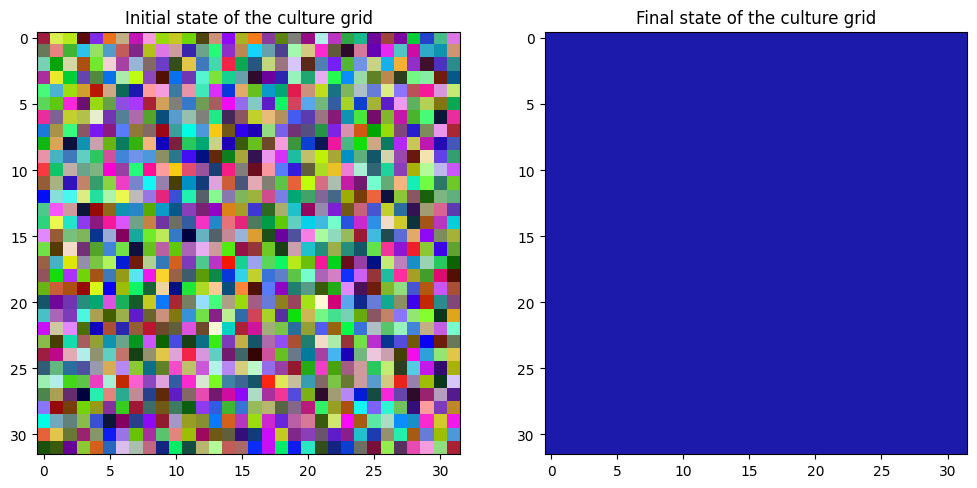

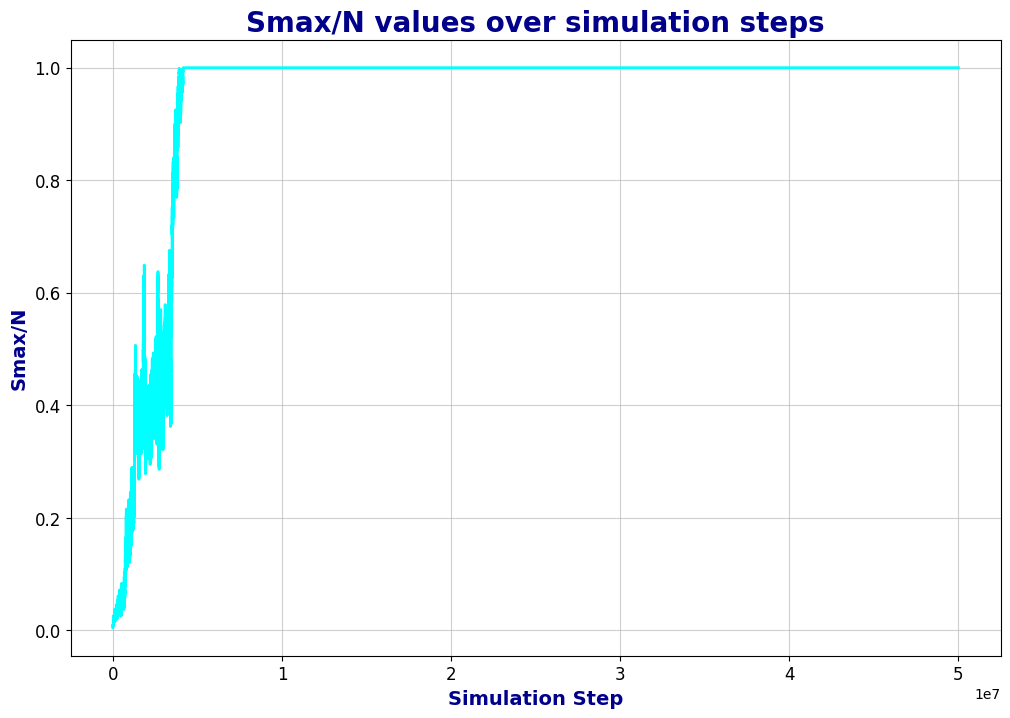

In [7]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid')

Smax_norm = []

# Run the simulation for a certain number of steps
for _ in range(50000000):
    simulation_step()
    T = calculate_Smax(culture_grid)/(grid_size**2)
    Smax_norm.append(T)

# Create a plot for Smax_norm over simulation steps
plt.figure(figsize=(12, 8)) # Create a new figure with a specific size (in inches)
plt.plot(Smax_norm, color='cyan', linewidth=2, linestyle='solid') # Create a plot with a custom line color, width, and style
plt.grid(True, linestyle='solid', alpha=0.6) # Add a grid
plt.title('Smax/N values over simulation steps', fontsize=20, fontweight='bold', color='darkblue') # Add a title with a custom font size

plt.xlabel('Simulation Step', fontsize=14, fontweight='bold', color='darkblue') # Label x-axis

# Label y-axis
plt.ylabel('Smax/N', fontsize=14, fontweight='bold', color='darkblue')

# Increase tick label size for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid')

plt.show()

In [ ]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

list = []

# Run the simulation for a certain number of steps
for _ in range(10000000):
    simulation_step_with_noise()
    T = calculate_Smax(culture_grid)/(grid_size**2)
    list.append(T)

In [ ]:
# Create a plot of the values in the list
plt.figure(figsize=(10,6))
plt.plot(list)
plt.title('Smax values over simulation steps')
plt.xlabel('Simulation Step')
plt.ylabel('Smax')
plt.show()

In [ ]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

list = []

# Run the simulation for a certain number of steps
for _ in range(10000000):
    simulation_step_with_noise_and_media()
    T = calculate_Smax(culture_grid)/(grid_size**2)
    list.append(T)

In [ ]:
# Create a plot of the values in the list
plt.figure(figsize=(10,6))
plt.plot(list)
plt.title('Smax values over simulation steps')
plt.xlabel('Simulation Step')
plt.ylabel('Smax')
plt.show()

In [ ]:
np.average(list)

In [ ]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid')

# Run the simulation for a certain number of steps
for _ in range(30000000):
    simulation_step()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid')

plt.show()

In [ ]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

# Run the simulation for a certain number of steps
for _ in range(30000000):
    simulation_step_with_noise()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise')

plt.show()

In [ ]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

# Run the simulation with noise and mass media influence for a certain number of steps
for _ in range(30000000):
    simulation_step_with_noise_and_media()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise and mass media influence')

plt.show()

In [ ]:
import numpy as np
from scipy.ndimage import label

In [ ]:


# Function to calculate the initial degree of disorder (q)
def calculate_q(culture_grid):
    # Compute a unique integer for each possible culture
    culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    # Flatten the culture grid
    culture_integers_flat = culture_integers.flatten()
    # Encode the unique integers as class labels
    label_encoder = LabelEncoder()
    culture_labels = label_encoder.fit_transform(culture_integers_flat)
    # Compute the class weights
    class_weights = compute_class_weight('balanced', np.unique(culture_labels), culture_labels)
    # Return the sum of the class weights
    return np.sum(class_weights)

In [ ]:
# q = calculate_q(culture_grid)
Smax = calculate_Smax(culture_grid)

print(Smax)
print(culture_grid.size)

In [ ]:
T = Smax/(grid_size**2)
print(T)

In [ ]:
# Run the simulation multiple times and store the results
results = [run_simulation_and_calculate_Smax_and_q(100000) for _ in range(10)]

# Convert the results to a numpy array
results = np.array(results)

# Plot Smax/N as a function of q
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 0] / (grid_size * grid_size))
plt.xlabel('q')
plt.ylabel('Smax/N')
plt.title('Order parameter (Smax/N) as a function of the control parameter (q)')
plt.grid(True)
plt.show()

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector
import random

class Turtle(Agent):
    def __init__(self, unique_id, model, color):
        super().__init__(unique_id, model)
        self.color = color
        self.happy = False

    def step(self):
        similar = 0
        different = 0

        for neighbor in self.model.grid.neighbor_iter(self.pos):
            if isinstance(neighbor, Turtle):
                if neighbor.color == self.color:
                    similar += 1
                else:
                    different += 1

        if similar + different > 0:
            self.happy = similar / (similar + different) > self.model.similarity_threshold

        if not self.happy:
            self.model.grid.move_to_empty(self)

class Schelling(Model):
    def __init__(self, width, height, density, similarity_threshold):
        self.width = width
        self.height = height
        self.density = density
        self.similarity_threshold = similarity_threshold

        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(width, height, torus=True)

        self.datacollector = DataCollector(
            {"happy": lambda m: self.count_happy(m)}
        )
        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            if random.random() < self.density:
                if random.random() < 0.5:
                    agent = Turtle(self.next_id(), self, "orange")
                else:
                    agent = Turtle(self.next_id(), self, "blue")
                self.grid.position_agent(agent, (x, y))
                self.schedule.add(agent)

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

    @staticmethod
    def count_happy(model):
        happy = 0
        for agent in model.schedule.agents:
            if agent.happy:
                happy += 1
        return happy

model = Schelling(10, 10, 0.8, 0.5)
for i in range(100):
    model.step()

# Plot the number of unhappy agents over time
unhappy_data = model.datacollector.get_model_vars_dataframe()["unhappy"]
plt.figure()
unhappy_data.plot()
plt.title('Number of Unhappy Agents Over Time')
plt.xlabel('Step')
plt.ylabel('Number of Unhappy Agents')

# Plot the percent of similar agents over time
similar_data = model.datacollector.get_model_vars_dataframe()["similar"]
plt.figure()
similar_data.plot()
plt.title('Percent of Similar Agents Over Time')
plt.xlabel('Step')
plt.ylabel('Percent of Similar Agents')

plt.show()